In [30]:
import sys
sys.path.append("../functions")
from models_prop import GaussianCoeffs, propagation_ew
from abtem.core.energy import energy2sigma
import numpy as np
from matplotlib import pyplot as plt
import hyperspy.api as hs

In [127]:
tempas_dir = "../tempas_results/single_atom_propagation/"
signal = hs.load(tempas_dir+"column_20atoms.tif").data
ew = signal[:,:,0] + 1j*signal[:,:,1]

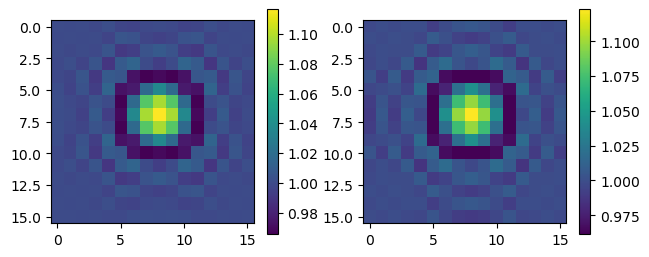

In [128]:
a = 2.024700; width = ew.shape[0]
energy = 300e3; sampling = a/(width-1)
sigma = energy2sigma(energy)
x0 = 8; y0 = 7
x = (np.arange(0, width, 1) - x0)*sampling
y = (np.arange(0, width, 1) - y0)*sampling
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
AlCoeffs = GaussianCoeffs("Al")
potential = AlCoeffs.projected_potential(r.ravel()).reshape(r.shape)
wave_ex = 1 + 1j*sigma*potential
#distance = (1-0.987200)*78.963303
distance = 10
AlCoeffs.propagate(distance, energy)
potential_prop = AlCoeffs.projected_potential(r.ravel()).reshape(r.shape)
wave_prop1 = 1 + 1j*sigma*potential_prop
wave_prop2 = propagation_ew(wave_ex, distance, sampling, energy)
plt.subplot(1, 2, 1)
plt.imshow(np.abs(wave_prop1))
plt.colorbar(shrink=0.5)
#plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(wave_prop2))
plt.colorbar(shrink=0.5)
#plt.axis("off")
plt.tight_layout()
plt.show()

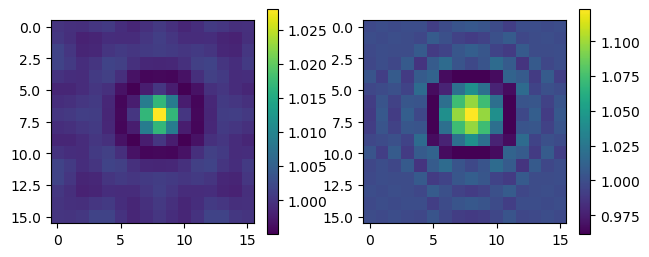

In [129]:
plt.subplot(1, 2, 1)
plt.imshow(np.abs(ew))
plt.colorbar(shrink=0.5)
#plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(wave_prop2))
plt.colorbar(shrink=0.5)
#plt.axis("off")
plt.tight_layout()
plt.show()

In [59]:
np.unravel_index(np.argmax(np.abs(ew)), ew.shape)

(7, 8)

In [51]:
ew.shape

(16, 16)